#### Importing Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### Loading dataset

In [3]:
df = pd.read_excel('D:\SEM 4\\astrotrain.xlsx')

In [4]:
df

,SUBSURVEY,SNID,IAUC,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
0,,10473255,NULL,2,53.468451,-28.349424,0.27,-9,-9,44,...,23.664705,1,1,1,1,2.378913e+00,1.384469,1.228777e+00,1.400711e+00,-9
1,,2110040,NULL,2,53.508185,-28.470810,0.27,-9,-9,50,...,24.363064,1,1,1,1,3.254097e-14,7.968017,3.885829e+00,3.697690e+00,-9
2,,9966178,NULL,2,35.077432,-6.979272,0.27,-9,-9,51,...,23.319248,1,1,1,1,5.848331e-01,0.558739,4.993262e-01,5.252323e-01,-9
3,,19732134,NULL,2,52.852204,-27.184372,0.27,-9,-9,3,...,22.917084,1,1,1,1,4.299130e+00,13.111013,1.955982e+01,3.461016e+01,-9
4,,1582526,NULL,2,36.932302,-5.248342,0.27,-9,-9,55,...,22.626780,1,1,1,1,2.718171e-01,0.285706,4.163428e-01,5.431316e-01,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,,16005072,NULL,2,40.736879,-1.961712,0.27,-9,-9,60,...,22.403696,1,1,1,1,2.884062e-01,0.663230,1.186423e+00,2.066639e+00,-9
39996,,32180995,NULL,2,52.286809,-27.336364,0.27,-9,-9,4,...,24.779268,1,1,1,1,1.663175e-14,1.023620,2.192368e+00,2.528582e+00,-9
39997,,3508417,NULL,2,54.662131,-27.642363,0.27,-9,-9,54,...,23.454807,1,1,1,1,8.707220e-15,0.335223,9.132640e-01,1.670266e+00,-9
39998,,16194817,NULL,2,53.313236,-27.079382,0.27,-9,-9,25,...,-9.000000,1,1,1,1,1.536111e-02,0.020247,2.152173e-13,2.263497e-13,-9


#### Basic EDA

In [5]:
df.shape

(40000, 82)

In [6]:
df.describe()

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
count,4.000000e+04,40000.0,40000.000000,40000.000000,4.000000e+04,40000.0,40000.0,40000.00000,40000.000000,40000.000000,...,40000.000000,40000.0,40000.0,40000.0,40000.0,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.0
mean,1.676771e+07,2.0,39.835341,-19.407487,2.700000e-01,-9.0,-9.0,31.58690,113.696525,59.514675,...,22.711626,1.0,1.0,1.0,1.0,1.019355e+01,3.732287e+00,4.883576e+00,7.001202e+00,-9.0
std,9.683794e+06,0.0,14.800212,15.051050,2.646250e-13,0.0,0.0,17.43592,12.265149,24.185423,...,5.092737,0.0,0.0,0.0,0.0,4.586269e+02,6.478933e+00,7.795332e+00,1.688017e+01,0.0
min,2.354000e+03,2.0,6.392980,-44.976723,2.700000e-01,-9.0,-9.0,1.00000,101.000000,5.000000,...,-9.000000,1.0,1.0,1.0,1.0,1.006474e-32,3.767641e-33,9.054460e-14,2.553218e-14,-9.0
25%,8.367022e+06,2.0,35.716156,-28.640380,2.700000e-01,-9.0,-9.0,16.00000,101.000000,42.000000,...,22.935463,1.0,1.0,1.0,1.0,6.521853e-14,9.364567e-01,1.249910e+00,1.574110e+00,-9.0
50%,1.686448e+07,2.0,41.157764,-27.204088,2.700000e-01,-9.0,-9.0,32.00000,120.000000,60.000000,...,23.490799,1.0,1.0,1.0,1.0,5.749799e-01,1.987298e+00,2.595640e+00,3.422674e+00,-9.0
75%,2.510454e+07,2.0,52.866702,-4.633564,2.700000e-01,-9.0,-9.0,47.00000,122.000000,73.000000,...,24.060365,1.0,1.0,1.0,1.0,2.064853e+00,4.234644e+00,5.399975e+00,7.365328e+00,-9.0
max,3.359532e+07,2.0,55.512060,0.978050,2.700000e-01,-9.0,-9.0,62.00000,133.000000,223.000000,...,28.017927,1.0,1.0,1.0,1.0,6.577444e+04,5.800674e+02,2.593467e+02,1.226156e+03,-9.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBSURVEY             40000 non-null  object 
 1   SNID                  40000 non-null  int64  
 2   IAUC                  40000 non-null  object 
 3   FAKE                  40000 non-null  int64  
 4   RA                    40000 non-null  float64
 5   DECL                  40000 non-null  float64
 6   PIXSIZE               40000 non-null  float64
 7   NXPIX                 40000 non-null  int64  
 8   NYPIX                 40000 non-null  int64  
 9   CCDNUM                40000 non-null  int64  
 10  SNTYPE                40000 non-null  int64  
 11  NOBS                  40000 non-null  int64  
 12  PTROBS_MIN            40000 non-null  int64  
 13  PTROBS_MAX            40000 non-null  int64  
 14  MWEBV                 40000 non-null  float64
 15  MWEBV_ERR          

In [8]:
# Drop non-numeric columns 
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [9]:
# Calculating NULL values
numeric_df.isna().sum()

SNID                   0
FAKE                   0
RA                     0
DECL                   0
PIXSIZE                0
                      ..
SIM_GALFRAC_g          0
SIM_GALFRAC_r          0
SIM_GALFRAC_i          0
SIM_GALFRAC_z          0
SIM_SUBSAMPLE_INDEX    0
Length: 78, dtype: int64

In [10]:
df['SNTYPE'].unique()

array([133, 101, 122, 120, 121, 132, 123], dtype=int64)

#### Imputing the data

In [11]:
imputer = KNNImputer()
imputed_data = imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)

In [12]:
imputed_df

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
0,10473255.0,2.0,53.468451,-28.349424,0.27,-9.0,-9.0,44.0,133.0,61.0,...,23.664705,1.0,1.0,1.0,1.0,2.378913e+00,1.384469,1.228777e+00,1.400711e+00,-9.0
1,2110040.0,2.0,53.508185,-28.470810,0.27,-9.0,-9.0,50.0,101.0,69.0,...,24.363064,1.0,1.0,1.0,1.0,3.254097e-14,7.968017,3.885829e+00,3.697690e+00,-9.0
2,9966178.0,2.0,35.077432,-6.979272,0.27,-9.0,-9.0,51.0,122.0,65.0,...,23.319248,1.0,1.0,1.0,1.0,5.848331e-01,0.558739,4.993262e-01,5.252323e-01,-9.0
3,19732134.0,2.0,52.852204,-27.184372,0.27,-9.0,-9.0,3.0,120.0,34.0,...,22.917084,1.0,1.0,1.0,1.0,4.299130e+00,13.111013,1.955982e+01,3.461016e+01,-9.0
4,1582526.0,2.0,36.932302,-5.248342,0.27,-9.0,-9.0,55.0,101.0,65.0,...,22.626780,1.0,1.0,1.0,1.0,2.718171e-01,0.285706,4.163428e-01,5.431316e-01,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,16005072.0,2.0,40.736879,-1.961712,0.27,-9.0,-9.0,60.0,101.0,46.0,...,22.403696,1.0,1.0,1.0,1.0,2.884062e-01,0.663230,1.186423e+00,2.066639e+00,-9.0
39996,32180995.0,2.0,52.286809,-27.336364,0.27,-9.0,-9.0,4.0,121.0,59.0,...,24.779268,1.0,1.0,1.0,1.0,1.663175e-14,1.023620,2.192368e+00,2.528582e+00,-9.0
39997,3508417.0,2.0,54.662131,-27.642363,0.27,-9.0,-9.0,54.0,121.0,32.0,...,23.454807,1.0,1.0,1.0,1.0,8.707220e-15,0.335223,9.132640e-01,1.670266e+00,-9.0
39998,16194817.0,2.0,53.313236,-27.079382,0.27,-9.0,-9.0,25.0,101.0,7.0,...,-9.000000,1.0,1.0,1.0,1.0,1.536111e-02,0.020247,2.152173e-13,2.263497e-13,-9.0


#### Scaling

- Scaling is needed for LDA to ensure that each feature contributes equally to the covariance matrix calculation, enabling LDA to accurately capture the discriminative information between classes.

In [13]:
X = imputed_df.drop(columns=['SNTYPE'])
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

- A covariance matrix is a square matrix that summarizes the covariances between multiple variables in a dataset, providing information about the relationships and variability among them.

In [14]:
covariance_matrix = np.cov(scaled_df.T)
covariance_df = pd.DataFrame(covariance_matrix, columns=X.columns, index=X.columns)

In [15]:
print("Covariance Matrix:")
print(covariance_df)

Covariance Matrix:
                         SNID  FAKE        RA      DECL  PIXSIZE  NXPIX  \
SNID                 1.000025   0.0 -0.008677 -0.001440      0.0    0.0   
FAKE                 0.000000   0.0  0.000000  0.000000      0.0    0.0   
RA                  -0.008677   0.0  1.000025  0.210767      0.0    0.0   
DECL                -0.001440   0.0  0.210767  1.000025      0.0    0.0   
PIXSIZE              0.000000   0.0  0.000000  0.000000      0.0    0.0   
...                       ...   ...       ...       ...      ...    ...   
SIM_GALFRAC_g        0.007041   0.0  0.003824  0.006285      0.0    0.0   
SIM_GALFRAC_r       -0.002338   0.0  0.081849 -0.001878      0.0    0.0   
SIM_GALFRAC_i        0.001718   0.0  0.067962 -0.006328      0.0    0.0   
SIM_GALFRAC_z        0.006199   0.0  0.033945 -0.006404      0.0    0.0   
SIM_SUBSAMPLE_INDEX  0.000000   0.0  0.000000  0.000000      0.0    0.0   

                     NYPIX    CCDNUM      NOBS  PTROBS_MIN  ...  \
SNID         

- Diagonal Elements:

    - The diagonal elements of the covariance matrix represent the variance of each variable. For example, the variance of 'SNID' is approximately 1.0, and for 'FAKE', it is 0.0, indicating that 'SNID' varies more compared to 'FAKE', which doesn't vary at all.
    
- Off-Diagonal Elements:

    - Off-diagonal elements represent the covariance between pairs of variables.
    - Positive values indicate a positive linear relationship between variables, while negative values indicate a negative linear relationship.
    
   - For example:
    - The covariance between 'SNID' and 'RA' is approximately -0.0087, indicating a weak negative relationship between these two variables.
    - The covariance between 'RA' and 'DECL' is approximately 0.2108, indicating a weak positive relationship between these two variables.
    
- Interpretation:

    - Larger magnitude values of covariance indicate stronger relationships between variables.
    - Positive covariance suggests that as one variable increases, the other tends to increase as well, and vice versa for negative covariance.
    - Covariance values closer to zero indicate weaker relationships between variables.
    
- Application:

    - Understanding the covariance between variables helps in identifying patterns and relationships in the dataset.
    - It can assist in feature selection, dimensionality reduction, and building predictive models.

- The eigenvalues represent the amount of variance explained by each principal component. Higher eigenvalues indicate that the corresponding principal components capture more variance in the data.

- The eigenvectors represent the directions in the feature space along which the data varies the most. Each eigenvector corresponds to a principal component, and its elements indicate the weights of original features contributing to that component.

In [16]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_df = pd.DataFrame({'Eigenvalue': eigen_values, 'Eigenvector': eigen_vectors.tolist()}, index=range(1, len(eigen_values) + 1))

In [17]:
print("Eigenvalues and Eigenvectors:")
print(eigen_df)

Eigenvalues and Eigenvectors:
    Eigenvalue                                        Eigenvector
1    13.999325  [0.0013545423030781318, 0.0007034168044895521,...
2     5.099356  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3     4.440383  [-0.03952764523244667, -0.039367611804096515, ...
4     3.514321  [0.00013822784176947622, 0.1254362357926903, -...
5     3.019821  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
..         ...                                                ...
73    0.000000  [0.0006987502569713063, -0.005527670004679749,...
74    0.000000  [0.03313717442614215, -0.24165385804355993, -0...
75    0.000000  [0.0664418515258149, -0.2658697638612325, -0.0...
76    0.000000  [0.05437371335643973, -0.20305845891394006, -0...
77    0.000000  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[77 rows x 2 columns]


- Eigenvalues: Eigenvalues represent the variance explained by each principal component.Higher eigenvalues indicate that the corresponding principal components capture more variance in the data. In the given data, the first eigenvalue is significantly larger than the rest, suggesting that the first principal component explains a substantial amount of variance in the dataset compared to the others.

- Eigenvectors: Eigenvectors represent the directions in the feature space along which the data varies the most.The elements of each eigenvector indicate the weights of the original features contributing to that principal component.In the given data, each eigenvector provides insight into the linear combinations of features that define the principal components. The magnitude of each element indicates the importance of the corresponding feature in defining that principal component.

#### LDA

- This code block initializes an LDA object and applies it to the input data X and target variable df['SNTYPE'], transforming the features into a lower-dimensional space optimized for class separation.

In [18]:
# Applying Linear Discriminant Analysis (LDA)
lda = LDA()
X_lda_transformed = lda.fit_transform(X, df['SNTYPE'])

In [19]:
lda_df = pd.DataFrame(data=X_lda_transformed, columns=[f'LDA_Component_{i+1}' for i in range(X_lda_transformed.shape[1])])
lda_df['SNTYPE'] = df['SNTYPE']

In [20]:
print("Transformed Data using LDA:")
lda_df

Transformed Data using LDA:


,LDA_Component_1,LDA_Component_2,LDA_Component_3,LDA_Component_4,LDA_Component_5,LDA_Component_6,SNTYPE
0,0.049708,-1.488882,2.498888,-1.237078,1.266791,-0.851082,133
1,-5.012146,0.167915,0.065410,0.012583,0.385814,-0.797245,101
2,-4.074246,0.344643,2.105269,-0.255343,0.470286,-1.060719,122
3,5.439154,1.542011,0.035099,-0.759365,-0.386899,-1.034133,120
4,-4.427742,1.334575,-0.074228,0.529264,-0.692295,-1.112668,101
...,...,...,...,...,...,...,...
39995,-4.472063,0.930658,0.031483,0.330719,-0.700951,-0.819922,101
39996,4.746777,-0.244793,-0.550307,0.129253,0.745151,-0.251954,121
39997,4.469568,0.588432,-0.900135,1.588540,2.014375,-0.266238,121
39998,-6.847593,-0.774149,-6.428330,0.367821,-1.581722,-3.415921,101


- The provided data represents the transformed features after applying Linear Discriminant Analysis (LDA). Each row corresponds to a data point, where LDA_Component_1, LDA_Component_2, and so on, represent the new dimensions generated by LDA. These dimensions are optimized for maximizing class separation. The SNTYPE column indicates the corresponding class label for each data point. From the data, it can be inferred that LDA has effectively reduced the dimensionality while preserving the discriminative information between different classes, as evidenced by the distinct separation of data points in the transformed space.

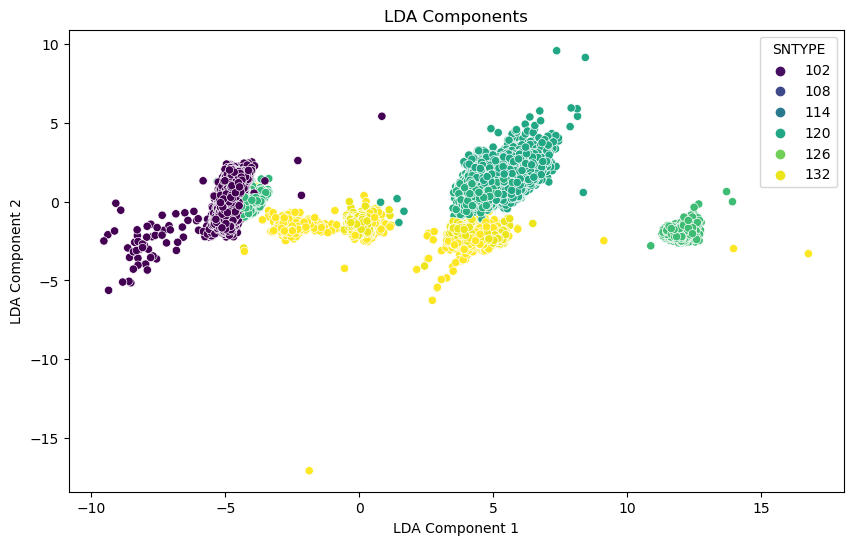

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x='LDA_Component_1', y='LDA_Component_2', hue='SNTYPE', palette='viridis')
plt.title('LDA Components')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [22]:
# Splitting the data using train test split for using it in the model
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda_transformed, df['SNTYPE'], test_size=0.2, random_state=42)

In [23]:
# Applying SVM model for classification and then printing its accuracy
model_svm_lda = SVC(random_state=42)
model_svm_lda.fit(X_train_lda, y_train_lda)
y_pred_svm_lda = model_svm_lda.predict(X_test_lda)
accuracy_svm_lda = accuracy_score(y_test_lda, y_pred_svm_lda)
print("Accuracy with LDA:", accuracy_svm_lda)

Accuracy with LDA: 0.998375


- When using Linear Discriminant Analysis (LDA) without specifying the number of components, the algorithm automatically determines the number of components based on the number of unique classes present in the target variable.

- The number of components is 1 less than the number of unique classes

- Thus, when the number of components is not specified, LDA generates as many components as necessary to capture the maximum discriminative information among the classes present in the dataset.

#### 2 Components

- This code snippet performs Linear Discriminant Analysis (LDA) with two components, transforming the dataset X based on the target variable df['SNTYPE'], and stores the transformed data along with the original target variable in a DataFrame for further analysis or visualization.

In [24]:
n_components = 2  
lda_manual = LDA(n_components=n_components)
X_lda_transformed_manual = lda_manual.fit_transform(X, df['SNTYPE'])

In [78]:
lda_df_manual = pd.DataFrame(data=X_lda_transformed_manual, columns=[f'LDA_Component_{i+1}' for i in range(n_components)])
lda_df_manual['SNTYPE'] = df['SNTYPE']

In [79]:
print("Transformed Data using LDA with specified components manually:")
print(lda_df_manual)

Transformed Data using LDA with specified components manually:
       LDA_Component_1  LDA_Component_2  SNTYPE
0             0.049708        -1.488882     133
1            -5.012146         0.167915     101
2            -4.074246         0.344643     122
3             5.439154         1.542011     120
4            -4.427742         1.334575     101
...                ...              ...     ...
39995        -4.472063         0.930658     101
39996         4.746777        -0.244793     121
39997         4.469568         0.588432     121
39998        -6.847593        -0.774149     101
39999         3.917023        -1.763563     132

[40000 rows x 3 columns]


- The table shows the transformed data after applying Linear Discriminant Analysis (LDA) with two specified components manually. Each row represents an observation in the dataset. The columns LDA_Component_1 and LDA_Component_2 contain the values of the two LDA components obtained from the transformation. The SNTYPE column represents the target variable associated with each observation.

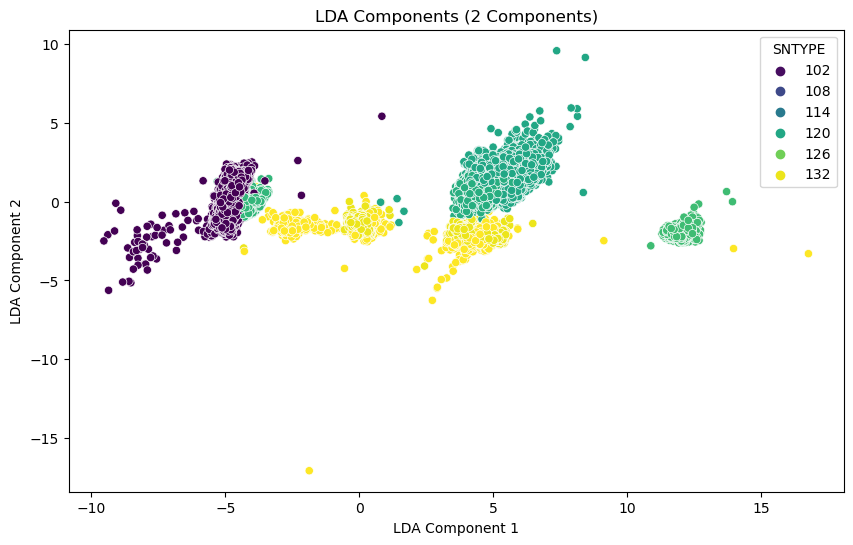

In [80]:
# Visualizing the LDA Components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df_manual, x='LDA_Component_1', y='LDA_Component_2', hue='SNTYPE', palette='viridis')
plt.title('LDA Components (2 Components)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [81]:
# Dividing the data into train and test sets
X_train_lda_manual, X_test_lda_manual, y_train_lda_manual, y_test_lda_manual = train_test_split(X_lda_transformed_manual, df['SNTYPE'], test_size=0.2, random_state=42)

# SVM for classification with LDA components
model_svm_lda_manual = SVC(random_state=42)
model_svm_lda_manual.fit(X_train_lda_manual, y_train_lda_manual)
y_pred_svm_lda_manual = model_svm_lda_manual.predict(X_test_lda_manual)
accuracy_svm_lda_manual = accuracy_score(y_test_lda_manual, y_pred_svm_lda_manual)
print("Accuracy with LDA (2 Components):", accuracy_svm_lda_manual)

Accuracy with LDA (2 Components): 0.923875


#### 3 Components

- This code snippet performs Linear Discriminant Analysis (LDA) with three components, transforming the dataset X based on the target variable df['SNTYPE'], and stores the transformed data along with the original target variable in a DataFrame for further analysis or visualization.

In [82]:
n_components = 3 
lda_manual_3 = LDA(n_components=n_components)
X_lda_transformed_manual_3 = lda_manual_3.fit_transform(X, df['SNTYPE'])

In [83]:
lda_df_manual_3 = pd.DataFrame(data=X_lda_transformed_manual_3, columns=[f'LDA_Component_{i+1}' for i in range(n_components)])
lda_df_manual_3['SNTYPE'] = df['SNTYPE']

In [84]:
print("Transformed Data using LDA with specified components (3 components):")
print(lda_df_manual_3)

Transformed Data using LDA with specified components (3 components):
       LDA_Component_1  LDA_Component_2  LDA_Component_3  SNTYPE
0             0.049708        -1.488882         2.498888     133
1            -5.012146         0.167915         0.065410     101
2            -4.074246         0.344643         2.105269     122
3             5.439154         1.542011         0.035099     120
4            -4.427742         1.334575        -0.074228     101
...                ...              ...              ...     ...
39995        -4.472063         0.930658         0.031483     101
39996         4.746777        -0.244793        -0.550307     121
39997         4.469568         0.588432        -0.900135     121
39998        -6.847593        -0.774149        -6.428330     101
39999         3.917023        -1.763563        -0.024871     132

[40000 rows x 4 columns]


- The table shows the transformed data after applying Linear Discriminant Analysis (LDA) with two specified components manually. Each row represents an observation in the dataset. The columns LDA_Component_1, LDA_Component_2, LDA_Component_3 contain the values of the two LDA components obtained from the transformation. The SNTYPE column represents the target variable associated with each observation.

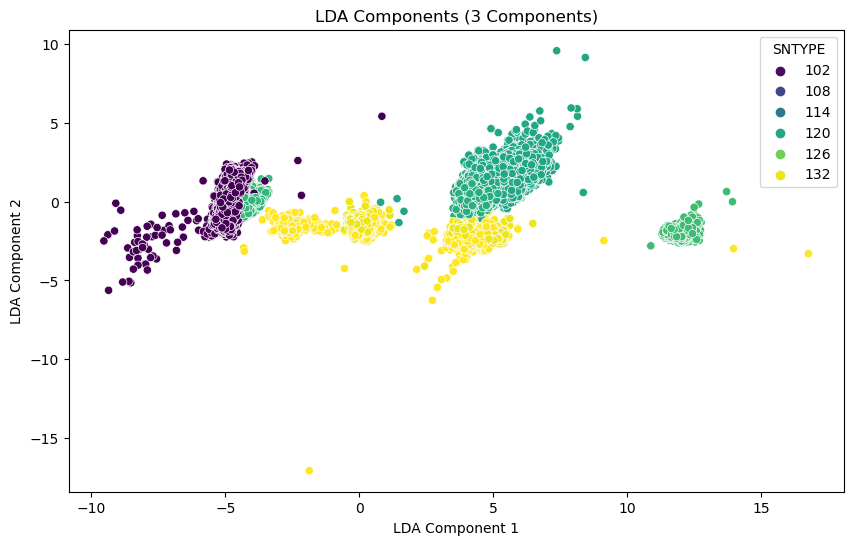

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df_manual_3, x='LDA_Component_1', y='LDA_Component_2', hue='SNTYPE', palette='viridis')
plt.title('LDA Components (3 Components)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [86]:
X_train_lda_manual_3, X_test_lda_manual_3, y_train_lda_manual_3, y_test_lda_manual_3 = train_test_split(X_lda_transformed_manual_3, df['SNTYPE'], test_size=0.2, random_state=42)

model_svm_lda_manual_3 = SVC(random_state=42)
model_svm_lda_manual_3.fit(X_train_lda_manual_3, y_train_lda_manual_3)
y_pred_svm_lda_manual_3 = model_svm_lda_manual_3.predict(X_test_lda_manual_3)
accuracy_svm_lda_manual_3 = accuracy_score(y_test_lda_manual_3, y_pred_svm_lda_manual_3)
print("Accuracy with LDA (3 Components):", accuracy_svm_lda_manual_3)

Accuracy with LDA (3 Components): 0.992125


#### Without LDA

In [87]:
# Splitting the data into train and test sets without LDA
X_train, X_test, y_train, y_test = train_test_split(X, df['SNTYPE'], test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Classification without LDA using SVM
model_svm_no_lda = SVC(random_state=42)
model_svm_no_lda.fit(X_train_scaled, y_train)
y_pred_svm_no_lda = model_svm_no_lda.predict(X_test_scaled)
accuracy_svm_no_lda = accuracy_score(y_test, y_pred_svm_no_lda)
print("Accuracy without LDA:", accuracy_svm_no_lda)

Accuracy without LDA: 0.99425


In [90]:
# Comparision of accuracies
accuracy_comparison_df = pd.DataFrame({
    'Model': ['SVM (with LDA)', 'SVM (with LDA - 2 Components)', 'SVM (with LDA - 3 Components)', 'SVM (without LDA)'],
    'Accuracy': [accuracy_svm_lda, accuracy_svm_lda_manual, accuracy_svm_lda_manual_3, accuracy_svm_no_lda]
})

accuracy_comparison_df

,Model,Accuracy
0,SVM (with LDA),0.998375
1,SVM (with LDA - 2 Components),0.923875
2,SVM (with LDA - 3 Components),0.992125
3,SVM (without LDA),0.994250


- Interpretation:

    - The SVM model trained with LDA transformation achieves the highest accuracy when using the default number of components.
    - When manually specifying 2 components for LDA, the accuracy drops significantly compared to the default LDA model. This suggests that reducing the number of components may lead to loss of discriminatory information.
    - However, specifying 3 components for LDA provides comparable accuracy to the default LDA model, indicating that the additional component captures valuable discriminatory information.
    - The SVM model trained without LDA also performs well, with a slightly lower accuracy compared to the default LDA model, suggesting that the LDA transformation may not be essential for achieving high accuracy in this case.